In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Numpy

In [3]:
img = plt.imread('/workspaces/predictive_maintenance/data/raw/imagenes/prodline.png') 


In [4]:
img.shape

(708, 1052, 4)

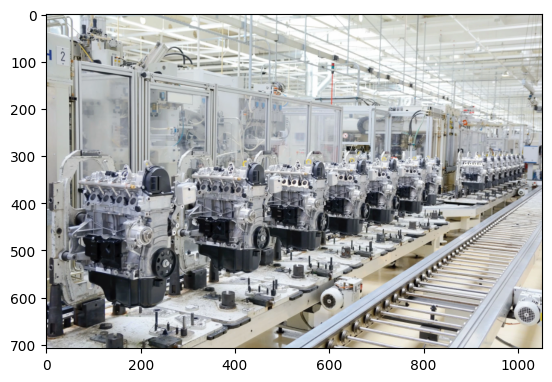

In [5]:
plt.imshow(img) 


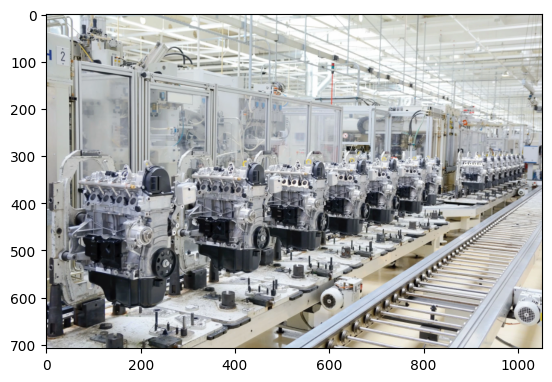

In [6]:
plt.imshow(img[:,:,:]) 


(708, 1052)


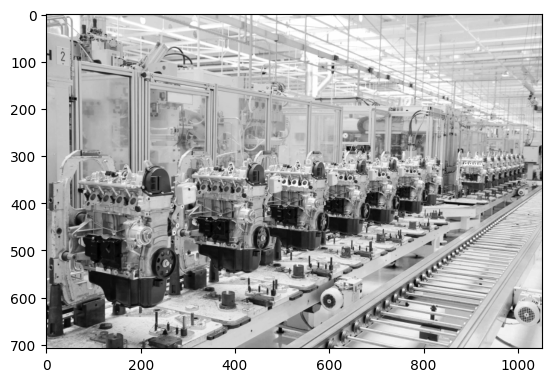

In [24]:
print (img[:,:,0].shape)

plt.imshow(img[:,:,0],cmap='gray') 

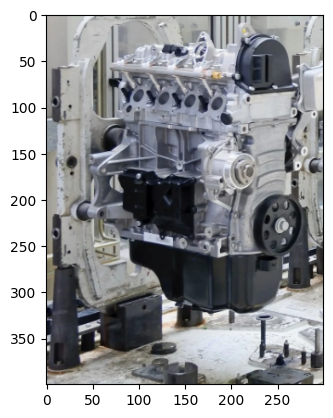

In [30]:
## Seleccionar solo uno de los motores 
plt.imshow(img[300:700,0:300,:]) 


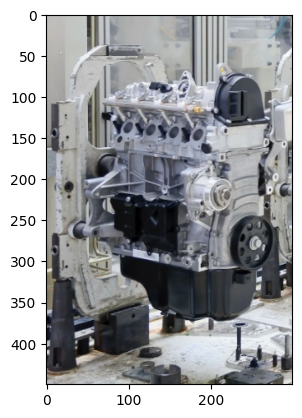

In [36]:
plt.imshow(img[250:700,0:300 ,:] )

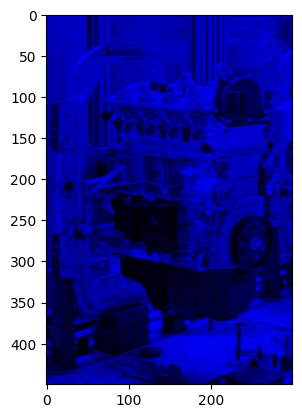

In [42]:

img_b = img[:,:,:].copy()
img_b[:,:,0] = 0 
img_b[:,:,1] = 0 
plt.imshow(img_b[250:700,0:300 ,:] )


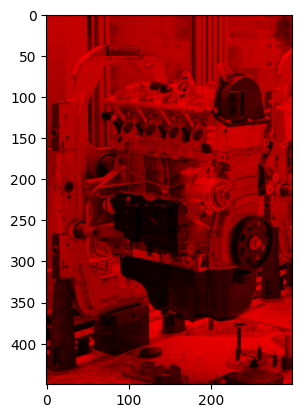

In [43]:
img_r = img[:,:,:].copy()
img_r[:,:,1] = 0
img_r[:,:,2] = 0
plt.imshow(img_r[250:700,0:300 ,:] )


## Pandas 

In [7]:
df = pd.read_parquet('/workspaces/predictive_maintenance/data/raw/PdM_telemetry.parquet')

In [8]:
df

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [46]:
df.describe() 

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [47]:
df.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

In [55]:
## convert to datetime 
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

 

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object

# Indexing  loc iloc 

In [65]:
df.loc[:15,['datetime','machineID','volt']].head(5)

,datetime,machineID,volt
0,2015-01-01 06:00:00,1,176.217853
1,2015-01-01 07:00:00,1,162.879223
2,2015-01-01 08:00:00,1,170.989902
3,2015-01-01 09:00:00,1,162.462833
4,2015-01-01 10:00:00,1,157.610021


In [63]:
df_sample = df.sample(100 ).copy() 

In [69]:
df_sample.iloc[:15,:3]

,datetime,machineID,volt
835710,2015-05-23 13:00:00,96,183.150681
799946,2015-04-23 13:00:00,92,166.101925
193677,2015-02-09 05:00:00,23,174.818886
180505,2015-08-09 11:00:00,21,188.490082
223552,2015-07-08 21:00:00,26,150.453460
458453,2015-05-01 07:00:00,53,199.251474
8030,2015-12-01 20:00:00,1,162.086359
705100,2015-06-26 02:00:00,81,161.756031
327460,2015-05-18 21:00:00,38,187.801305
379292,2015-04-18 07:00:00,44,176.974854


In [71]:
df_sample

,datetime
835710,2015-05-23 13:00:00
799946,2015-04-23 13:00:00
193677,2015-02-09 05:00:00
180505,2015-08-09 11:00:00
223552,2015-07-08 21:00:00
...,...
248987,2015-06-03 13:00:00
658049,2015-02-10 20:00:00
13441,2015-07-15 06:00:00
6291,2015-09-20 09:00:00


In [12]:
df[:10]




,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017
6,2015-01-01 12:00:00,1,156.556031,499.071623,111.755684,42.753920
7,2015-01-01 13:00:00,1,172.522781,409.624717,101.001083,35.482009
8,2015-01-01 14:00:00,1,175.324524,398.648781,110.624361,45.482287
9,2015-01-01 15:00:00,1,169.218423,460.850670,104.848230,39.901735


In [13]:
df['datetime']

0         2015-01-01 06:00:00
1         2015-01-01 07:00:00
2         2015-01-01 08:00:00
3         2015-01-01 09:00:00
4         2015-01-01 10:00:00
                 ...         
876095    2016-01-01 02:00:00
876096    2016-01-01 03:00:00
876097    2016-01-01 04:00:00
876098    2016-01-01 05:00:00
876099    2016-01-01 06:00:00
Name: datetime, Length: 876100, dtype: object

Bad pipe message: %s [b'\x0f\xbd\x90\xdc2A\xd9t\xe5\xdb!\x18P\x1b\xc7\x03=G \x82F\x9e[XL\xd5v\x94_%:;\xbbH\x14\x11\x93\x94%\xd4\x97\xe5\xe3=\xdd\xef\xb1,>cB\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00']
Bad pipe message: %s [b'\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06']
Bad pipe message: %s [b'\x07\x08']
Bad pipe message: %s [b'\t\x08\n\x08\x0b\x08\x04']
Bad pipe message: %s [b'\x08\x06\x04\x01\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x8ao\xbcm\x1a\xfb\x82+\x92\x87\xe0\xa9Y\x8b\x16\xc0@\xc5h\xeb\x9e\xdc']
Bad pipe message: %s [b'\xd0_\xa5\x9b\xa2']
Bad pipe message: %s [b"F\xa9\xc8\xda\x9e\xa0OY\xfe\xc6T\xb6+E\xb3\x94(\xbb\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc